# 🛍 Online Retail Dataset — Data Visualisation
This notebook covers:
- Data loading from cleaned dataset
- Create supportive columns
- Show discriptive statistics
- Daily sales over time graph
- Monthly sales over time graph
- Customer segments graph
- Top 10 Customers by Quantity Purchased
- Top 10 popular products graph

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')


In [9]:
# Load cleaned dataset
df = pd.read_csv("..\\Resources\\Online_Retail_Clean.csv")

# Data type optimization
df['InvoiceNo'] = df['InvoiceNo'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Quantity'] = df['Quantity'].astype('int32')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['UnitPrice'] = df['UnitPrice'].astype('float32')
df['CustomerID'] = df['CustomerID'].astype('category')
df['Country'] = df['Country'].astype('category')

# Extract Year, Month, Day, Weekday
df['Year'] = df['InvoiceDate'].dt.year.astype('int16')
df['Month'] = df['InvoiceDate'].dt.month.astype('int8')
df['MonthName'] = df['InvoiceDate'].dt.strftime('%b').astype('category')
df['Day'] = df['InvoiceDate'].dt.day.astype('int8')
df['Weekday'] = df['InvoiceDate'].dt.day_name().astype('category')

# Calculate total sales per transaction
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthName,Day,Weekday,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,Dec,1,Wednesday,15.300000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,Dec,1,Wednesday,20.340001
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,Dec,1,Wednesday,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,Dec,1,Wednesday,20.340001
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,Dec,1,Wednesday,20.340001


In [10]:
# Descriptive statistics
total_sales = df['TotalSales'].sum()
num_customers = df['CustomerID'].nunique()
num_invoices = df['InvoiceNo'].nunique()
num_products = df['StockCode'].nunique()
avg_transaction_value = total_sales / num_invoices

print("📊 Descriptive Statistics:")
print(f"Total Sales: £{total_sales:,.2f}")
print(f"Number of Unique Customers: {num_customers}")
print(f"Number of Unique Invoices: {num_invoices}")
print(f"Number of Unique Products: {num_products}")
print(f"Average Transaction Value: £{avg_transaction_value:,.2f}")


📊 Descriptive Statistics:
Total Sales: £9,726,006.91
Number of Unique Customers: 4372
Number of Unique Invoices: 25900
Number of Unique Products: 4070
Average Transaction Value: £375.52


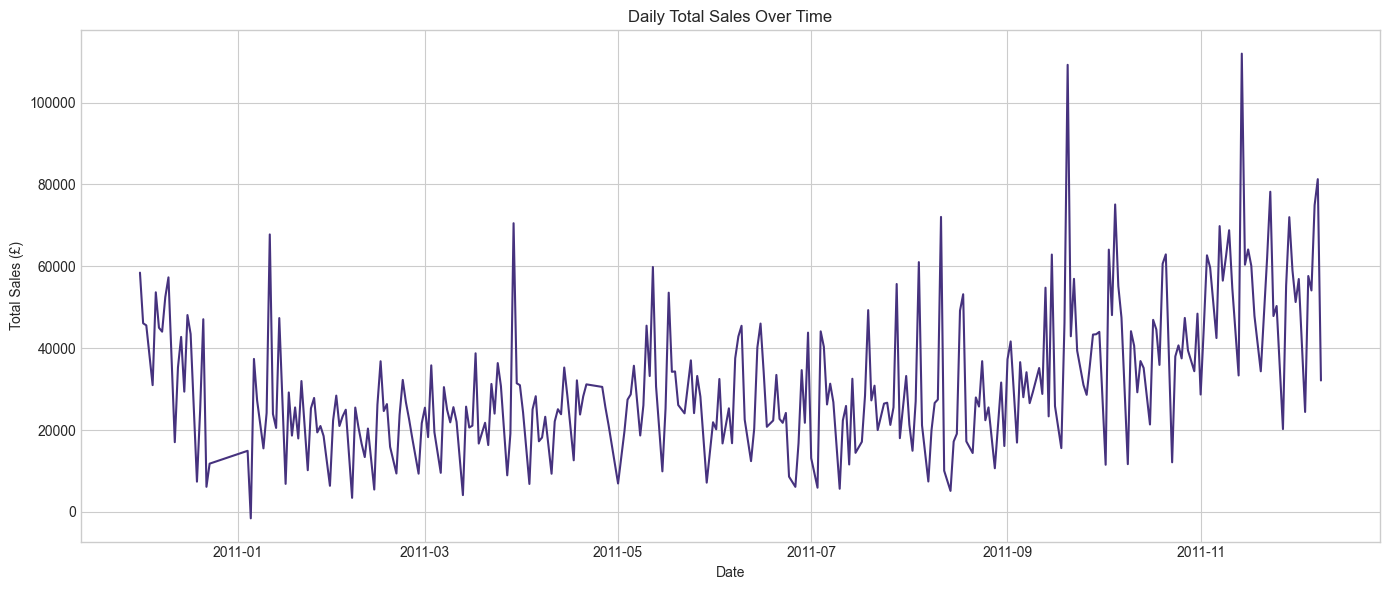

In [11]:
# Daily sales
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()
daily_sales['InvoiceDate'] = pd.to_datetime(daily_sales['InvoiceDate'])

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_sales, x='InvoiceDate', y='TotalSales')
plt.title('Daily Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.tight_layout()
plt.show()


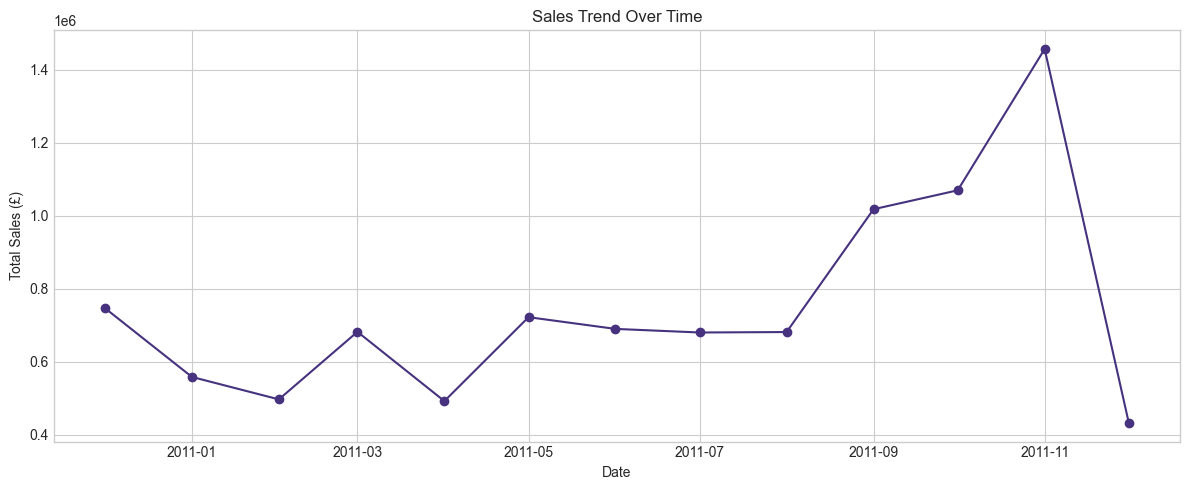

In [12]:
sales_trend = df.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()
sales_trend['YearMonth'] = pd.to_datetime(sales_trend['Year'].astype(str) + '-' + sales_trend['Month'].astype(str))

plt.figure(figsize=(12,5))
plt.plot(sales_trend['YearMonth'], sales_trend['TotalSales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.tight_layout()
plt.show()


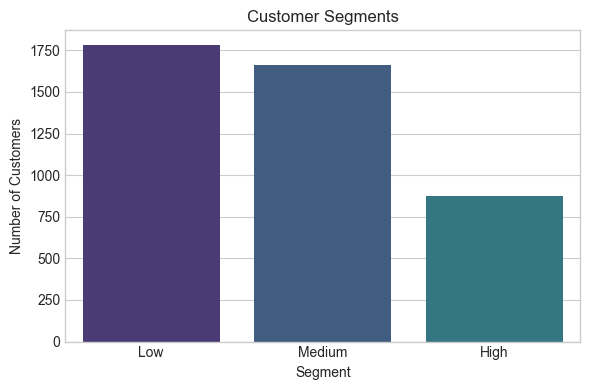

In [13]:
customer_seg = df.groupby('CustomerID', observed=True)['TotalSales'].agg(['sum', 'count']).reset_index()
customer_seg.columns = ['CustomerID', 'TotalSpent', 'PurchaseFrequency']

bins = [0, 500, 2000, np.inf]
labels = ['Low', 'Medium', 'High']
customer_seg['Segment'] = pd.cut(customer_seg['TotalSpent'], bins=bins, labels=labels)

plt.figure(figsize=(6,4))
sns.countplot(data=customer_seg, x='Segment', hue='Segment', legend=False)
plt.title('Customer Segments')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


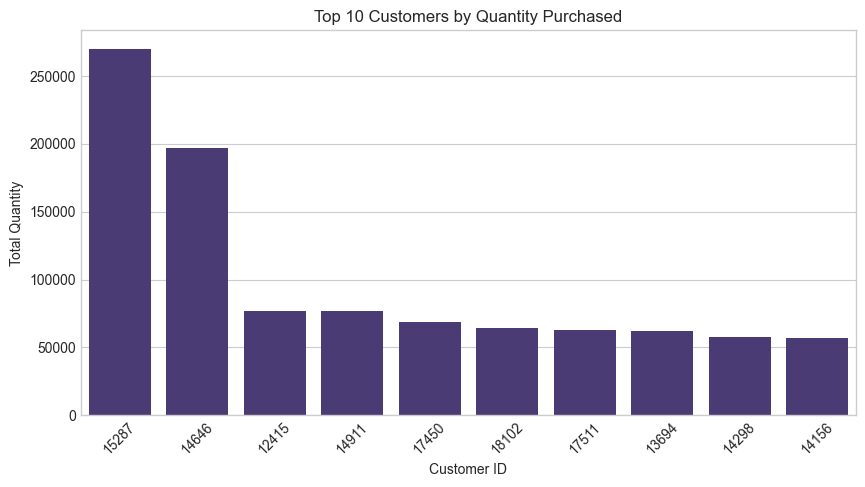

In [15]:
df['CustomerID'] = df['CustomerID'].astype(str)
customer_sales = df.groupby('CustomerID')['Quantity'].sum()
top_customers = customer_sales.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.xticks(rotation=45)
plt.title('Top 10 Customers by Quantity Purchased')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity')
plt.show()

Description
DOTCOM POSTAGE                        206245.480286
REGENCY CAKESTAND 3 TIER              164459.487793
WHITE HANGING HEART T-LIGHT HOLDER     99612.419963
PARTY BUNTING                          98243.879319
JUMBO BAG RED RETROSPOT                92175.788571
RABBIT NIGHT LIGHT                     66661.628772
POSTAGE                                66230.639969
PAPER CHAIN KIT 50'S CHRISTMAS         63715.239599
ASSORTED COLOUR BIRD ORNAMENT          58792.421878
CHILLI LIGHTS                          53746.659208
Name: TotalSales, dtype: float64


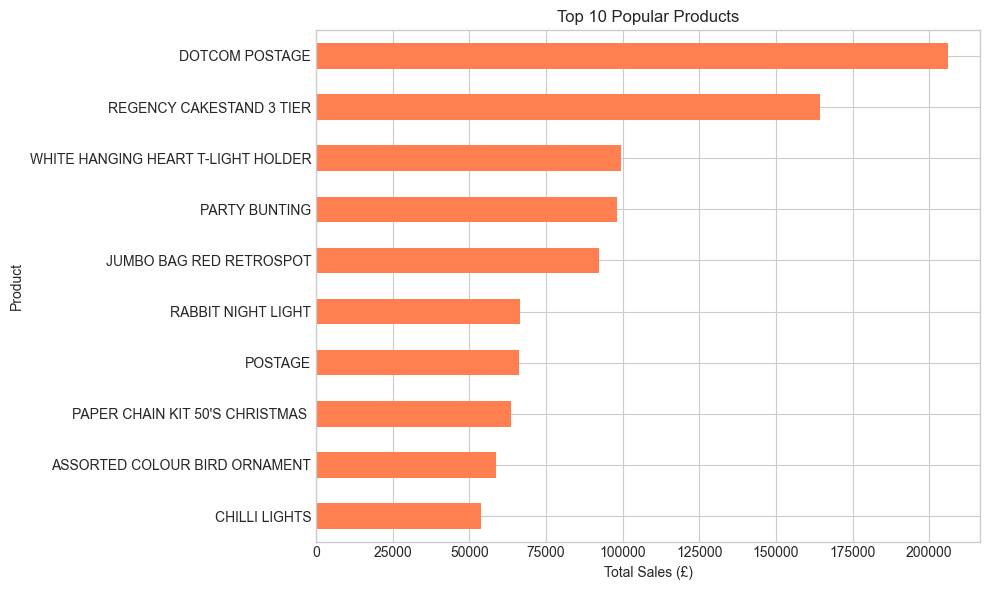

In [14]:
top_products = (df.groupby('Description', observed=True)['TotalSales']
                  .sum()
                  .sort_values(ascending=False)
                  .head(10))

print(top_products)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='coral')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product')
plt.title('Top 10 Popular Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
